# Modeling - Football Transfer Data Project

In this notebook, we will tackle our training and test sets created in the [previous notebook](http://localhost:8888/notebooks/Springboard/Springboard/Capstone%202/Capstone%202%20-%20Preprocessing%20and%20Training.ipynb) and try to run through a few models in an effort to create a best model for predicting market value.

We saved the split of data between training data (found in scaled_training.csv) and prediction data (found in prediciton.csv). Our training sets of data will be found in the scaled_training data set, which we will read in now, along with importing the necessary libraries.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('scaled_training.csv')
df.head()

train_df = pd.read_csv("training.csv")

As we can see, our dataframe for testing has already been scaled in the previous notebook. We will now recreate our training and test data split, as we did before.

In [29]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns='market_value')
y = train_df['market_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Selection

For this notebook, we will be creating and evaluating 5 models in an effort to find the best one for predicting market value for players in European Football. We will explore the following:

* Random Forest
* Gradient Boosting
* Support Vector Machines
* Singular Value Decomposition
* Principal Component Analysis

#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=25, criterion='mae', random_state=1234)

rf.fit(X_train, y_train)
y_pred = pd.Series(rf.predict(X_test))

In [31]:
from sklearn import tree, metrics

rf.score(X_test, y_test)

0.7554807107744317

#### Gradient Boosting Machine

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=1234)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

gb.score(X_test, y_test)

0.7105444702959238

#### Support Vector Machine

In [34]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

svr.score(X_test, y_test)

-0.08192861714009347

#### K Means Neighbors

In [35]:
from sklearn.cluster import KMeans

knn = KMeans()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

-1.2843458522445808e+16

In [37]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


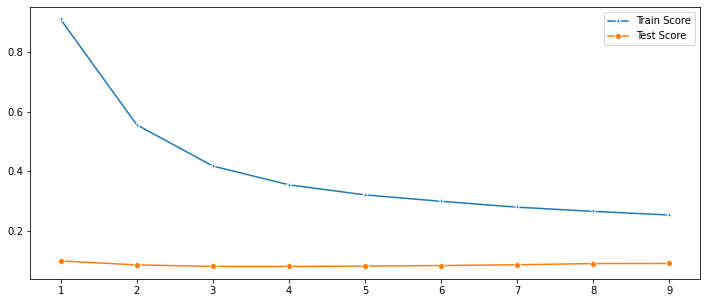

In [38]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')